In [ ]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

write how the files were produced:

In [3]:
beam_energies = [
    (0.5, uproot.open('data/v3.2.1-alpha-energy-0.5/type_events_energy_0.5_geometry_v14_events_10000_run_1.root')),
    (1.0, uproot.open('data/v3.2.1-alpha-energy-1.0/type_events_energy_1.0_geometry_v14_events_10000_run_1.root')),
    (1.5, uproot.open('data/v3.2.1-alpha-energy-1.5/type_events_energy_1.5_geometry_v14_events_10000_run_1.root')),
    (2.0, uproot.open('data/v3.2.1-alpha-energy-2.0/type_events_energy_2.0_geometry_v14_events_10000_run_1.root')),
    (2.5, uproot.open('data/v3.2.1-alpha-energy-2.5/type_events_energy_2.5_geometry_v14_events_10000_run_1.root')),
    (3.0, uproot.open('data/v3.2.1-alpha-energy-3.0/type_events_energy_3.0_geometry_v14_events_10000_run_1.root')),
    (3.5, uproot.open('data/v3.2.1-alpha-energy-3.5/type_events_energy_3.5_geometry_v14_events_10000_run_1.root')),
]

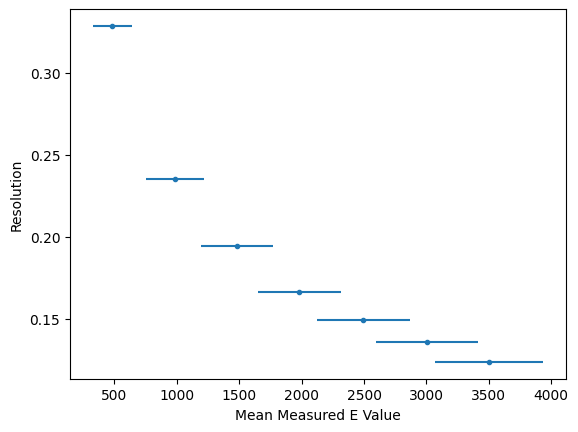

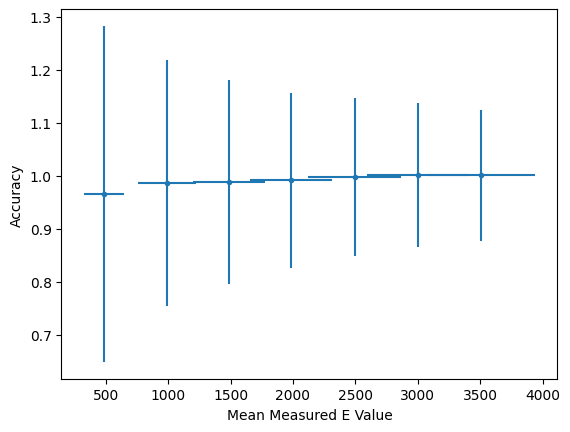

In [4]:
Etrue = np.array([])
resolutions = np.array([])
accuracies = np.array([])
means = np.array([])
mean_errors = np.array([])
stds = np.array([])
yas = np.array([])

for beam_energy, root_file in beam_energies:
    rec_energy = root_file['LDMX_Events/EcalVeto_valid/summedDet_'].array(library='np')
    mean = np.median(rec_energy)  # .mean()
    std = rec_energy.std()
    resolution = std / mean
    accuracy = mean / (beam_energy * 1000)
    Etrue = np.append(Etrue, beam_energy)
    resolutions = np.append(resolutions, resolution)
    accuracies = np.append(accuracies, accuracy)
    means = np.append(means, mean)
    stds = np.append(stds, std)
    mean_error = abs(mean - beam_energy * 1000)
    yerror = 1 / mean_error
    yerror1 = np.sqrt(stds) / 10000
    yerror2 = yerror * yerror1
    ya = std / (beam_energy * 1000)
    mean_errors = np.append(mean_errors, mean_error)
    yas = np.append(yas, ya)

plt.errorbar(means, resolutions, yerr=None, xerr=stds, fmt='.')
plt.xlabel('Mean Measured E Value')
plt.ylabel('Resolution')
plt.show()
plt.errorbar(means, accuracies, yerr=yas, xerr=stds, fmt='.')
plt.xlabel('Mean Measured E Value')
plt.ylabel('Accuracy')
plt.show()
#This really isn't any cleaner than the original method, just a different way of doing it. 

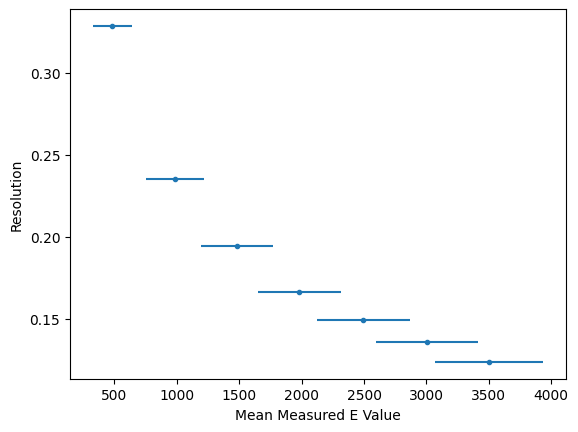

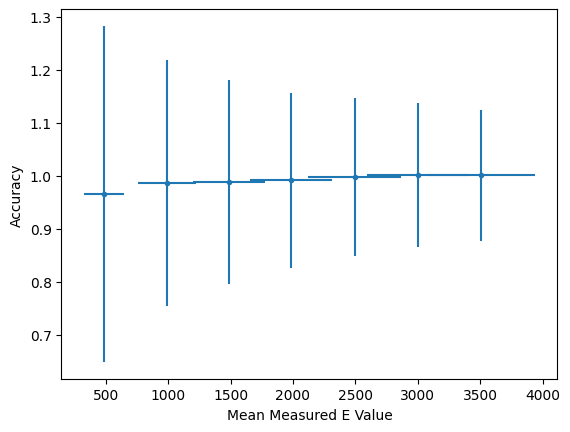

In [5]:

# Initialize empty arrays of a specific length, and then the for-loop is adding to the empty array
num_beams = len(beam_energies)
Etrue = np.zeros(num_beams)
resolutions = np.zeros(num_beams)
accuracies = np.zeros(num_beams)
means = np.zeros(num_beams)
mean_errors = np.zeros(num_beams)
stds = np.zeros(num_beams)
yas = np.zeros(num_beams)

for i, (beam_energy, root_file) in enumerate(beam_energies):
    rec_energy = root_file['LDMX_Events/EcalVeto_valid/summedDet_'].array(library='np')
    mean = np.median(rec_energy)  # .mean()
    std = rec_energy.std()
    resolution = std / mean
    accuracy = mean / (beam_energy * 1000)
    Etrue[i] = beam_energy
    resolutions[i] = resolution
    accuracies[i] = accuracy
    means[i] = mean
    stds[i] = std
    mean_error = abs(mean - beam_energy * 1000)
    yerror = 1 / mean_error
    yerror1 = np.sqrt(stds) / 10000
    yerror2 = yerror * yerror1
    ya = std / (beam_energy * 1000)
    mean_errors[i] = mean_error
    yas[i] = ya

plt.errorbar(means, resolutions, yerr=None, xerr=stds, fmt='.')
plt.xlabel('Mean Measured E Value')
plt.ylabel('Resolution')
plt.show()
plt.errorbar(means, accuracies, yerr=yas, xerr=stds, fmt='.')
plt.xlabel('Mean Measured E Value')
plt.ylabel('Accuracy')
plt.show()
#I still don't think it is any cleaner, but it is more efficient.

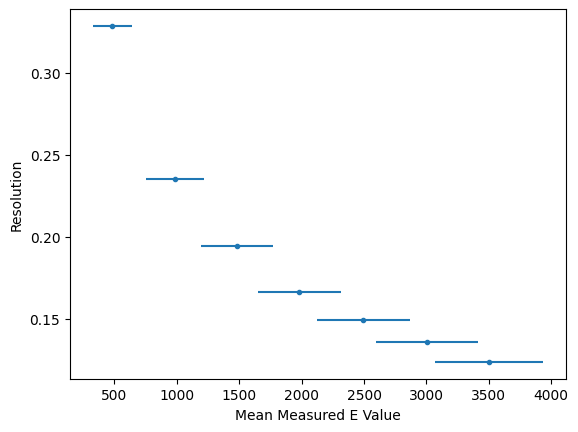

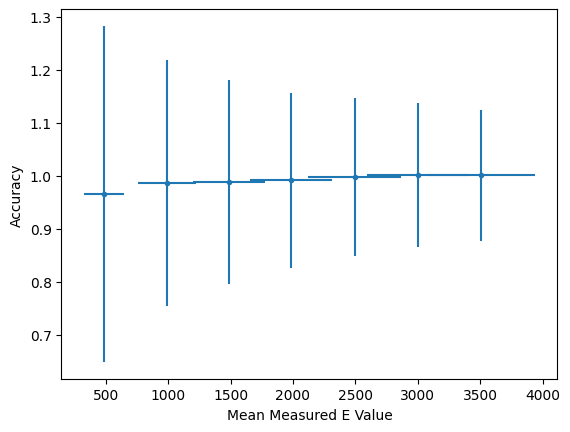

In [6]:
#Using the stack function:
import numpy as np

Etrue, resolutions, accuracies, means, mean_errors, stds, yas = [], [], [], [], [], [], []
for beam_energy, root_file in beam_energies:
    rec_energy = root_file['LDMX_Events/EcalVeto_valid/summedDet_'].array(library='np')
    mean = np.median(rec_energy)
    std = rec_energy.std()
    resolution = std / mean
    accuracy = mean / (beam_energy * 1000)
    Etrue.append(beam_energy)
    resolutions.append(resolution)
    accuracies.append(accuracy)
    means.append(mean)
    stds.append(std)
    mean_error = abs(mean - beam_energy * 1000)
    yerror = 1 / mean_error
    yerror1 = np.sqrt(stds) / 10000
    yerror2 = yerror * yerror1
    ya = std / (beam_energy * 1000)
    mean_errors.append(mean_error)
    yas.append(ya)

Etrue, resolutions, accuracies, means, mean_errors, stds, yas = map(np.array, [Etrue, resolutions, accuracies, means, mean_errors, stds, yas])
plt.errorbar(means, resolutions, yerr=None, xerr=stds, fmt='.')
plt.xlabel('Mean Measured E Value')
plt.ylabel('Resolution')
plt.show()
plt.errorbar(means, accuracies, yerr=yas, xerr=stds, fmt='.')
plt.xlabel('Mean Measured E Value')
plt.ylabel('Accuracy')
plt.show()


483.00946
986.598
1483.1211
1982.9325
2493.9915
3002.8755
3504.6953


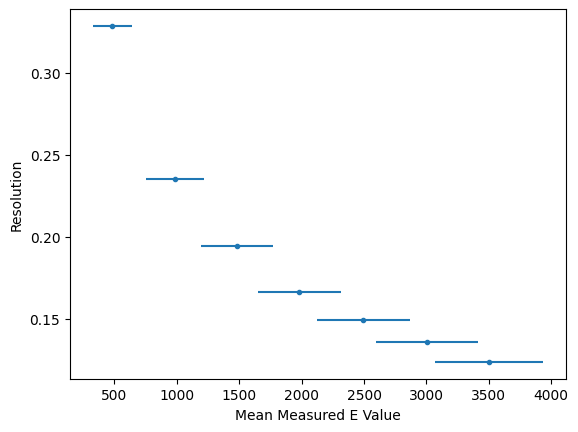

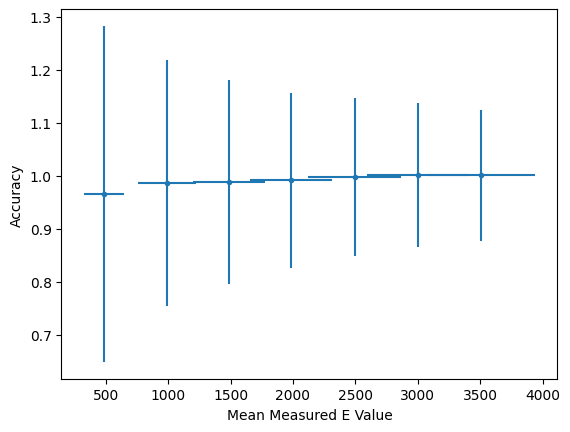

In [7]:
#Pandas- I think Pandas data frames win
data = []
#Creating an empty list to store the data as dictionaries
for beam_energy, root_file in beam_energies:
    rec_energy = root_file['LDMX_Events/EcalVeto_valid/summedDet_'].array(library='np')
    mean = np.median(rec_energy)
    std = rec_energy.std()
    resolution = std / mean
    accuracy = mean / (beam_energy * 1000)
    mean_error = abs(mean - beam_energy * 1000)
    ya = std / (beam_energy * 1000)
#Computing the values and then appending them to 'data' as a dictionary
    row = {'Etrue': beam_energy, 'resolution': resolution, 'accuracy': accuracy,
           'mean': mean, 'mean_error': mean_error, 'std': std, 'ya': ya}
    data.append(row)
    print(mean)
df = pd.DataFrame(data)
#Converting the list to a pandas data frame
plt.errorbar(df['mean'], df['resolution'], yerr=None, xerr=df['std'], fmt='.')
plt.xlabel('Mean Measured E Value')
plt.ylabel('Resolution')
plt.show()
plt.errorbar(df['mean'], df['accuracy'], yerr=df['ya'], xerr=df['std'], fmt='.')
plt.xlabel('Mean Measured E Value')
plt.ylabel('Accuracy')
plt.show()


Iterative Mean:
Distributions = the core distribution + outliers on the edges. 
Continously take the mean and remove any outliers that are further than some sigma away from the mean
Idea:
For loop for the total recordered energy for the different trials. inside the loop create a lower_bound and an upper_bound of mean +/- #nxSigma. Then use filtered_data to get the filtered_mean. This would be in a while loop where the stop condition is that the STD of the new 

Or: Take the weighted mean, but create an if statement so that is the value is more than Nsigma away, the weight is zero and therefore not included in the sum. Keep doing that until the total standard deviation of the newly calculated mean converges.  


Next Week- Graphing- for each set of measurments, plot the true histogram and then the normal dist. using the calculated mean and STD. 
compiling the pandas data frame example and pushing a good example to git hub
(goal is that other people can look at the graph without having to run the simulations)
to csv slides for next Thursday meetin

In [8]:
# first I write my own mean calculation that includes the possibility of weights
#   and returns both the mean and standard deviation
def weightedmean(values, weights = None) :
    """calculate the weighted mean and standard deviation of the input values
    
    If no weights are provided, then we assume they are all one.

    This is definitely slower than the pure-C NumPy implementation when
    the weights are all one, but we want to include the possibility of the 
    weights not being one _and_ the ability to calculate weighted standard
    deviations.
    """

    if weights is None :
        weights = np.full(len(values),1.)
#Returning an array with all the values =1 (i.e. weight =1 if unassigned)       
    if len(weights) != len(values) :
        raise ValueError('Weights must be an array the same length as values')

    mean = (weights*values).sum()/(weights.sum())
    stdd = np.sqrt((weights*(values-mean)**2).sum()/(weights.sum()))
    return mean, stdd

# now I can write the iterative mean
def itermean(values, weights = None, *, sigma_cut = 3.0) :
    """calculate an iterative mean and standard deviation

    If no weights are provided, then we assume they are all one.
    The sigma_cut parameter is what defines what an outlier is.
    If a sample is further from the mean than the sigma_cut times
    the standard deviation, it is removed.
    """

    # calculate weights once for ease
    if weights is None :
        weights = np.full(len(values), 1.)

    mean, stdd = weightedmean(values, weights)
    num_included = len(weights)+1 # just to get loop started
    selection = (weights > 0) # first selection is all non-zero weighted samples
    while np.count_nonzero(selection) < num_included :
        # update number included for this mean
        num_included = np.count_nonzero(selection)
        # calculate mean and std dev
        mean, stdd = weightedmean(values[selection], weights[selection])
        # determine new selection, since this variable was defined outside
        #   the loop, we can use it in the `while` line and it will just be updated
        selection = (values > (mean - sigma_cut*stdd)) & (values < (mean + sigma_cut*stdd)) & (weights > 0)

    # left loop, meaning we settled into a state where nothing is outside sigma_cut standard deviations
    #   from our mean
    return mean, stdd

In [30]:
x = itermean(rec_energy, np.full(len(rec_energy), 3.))
print(x)

(3519.2593645069487, 413.93701975780357)


In [10]:
def itermean2(values, weights = None, *, sigma_cut = 2.0) :
    """calculate an iterative mean and standard deviation

    If no weights are provided, then we assume they are all one.
    The sigma_cut parameter is what defines what an outlier is.
    If a sample is further from the mean than the sigma_cut times
    the standard deviation, it is removed.
    """

    # calculate weights once for ease
    if weights is None :
        weights = np.full(len(values), 1.)

    mean, stdd = weightedmean(values, weights)
    num_included = len(weights)+1
    selection = (weights > 0)
    while np.count_nonzero(selection) < num_included :
        num_included = np.count_nonzero(selection)
        mean, stdd = weightedmean(values[selection], weights[selection])
        selection = (values > (mean - sigma_cut*stdd)) & (values < (mean + sigma_cut*stdd)) & (weights > 0)
    return mean, stdd

In [52]:
def itermean4(values, weights = None, *, sigma_cut = 4.0) :
    if weights is None :
        weights = np.full(len(values), 1.)

    mean, stdd = weightedmean(values, weights)
    num_included = len(weights)+1
    selection = (weights > 0)
    while np.count_nonzero(selection) < num_included :
        num_included = np.count_nonzero(selection)
        mean, stdd = weightedmean(values[selection], weights[selection])
        selection = (values > (mean - sigma_cut*stdd)) & (values < (mean + sigma_cut*stdd)) & (weights > 0)
    return mean, stdd

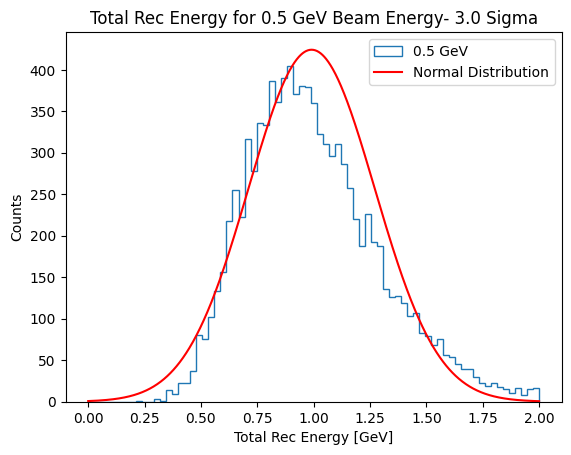

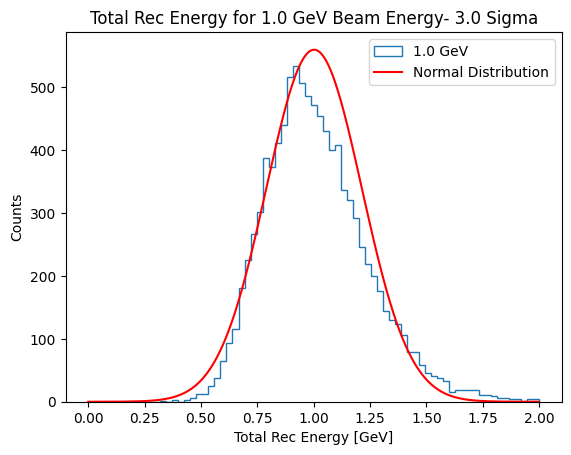

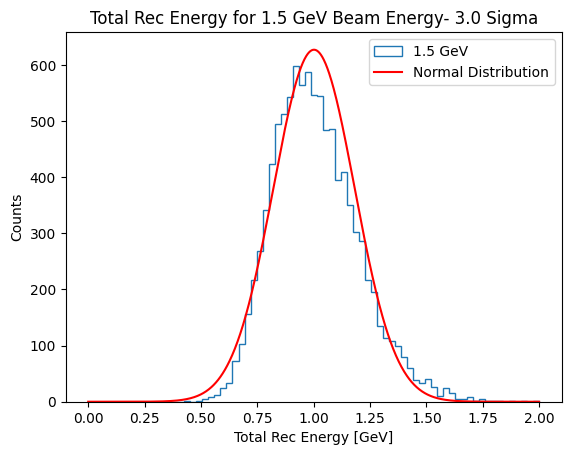

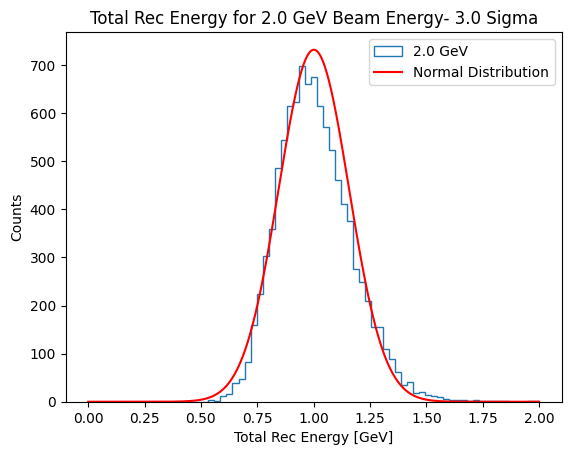

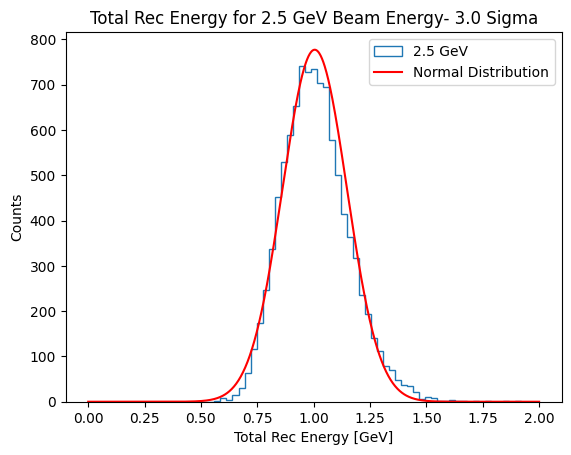

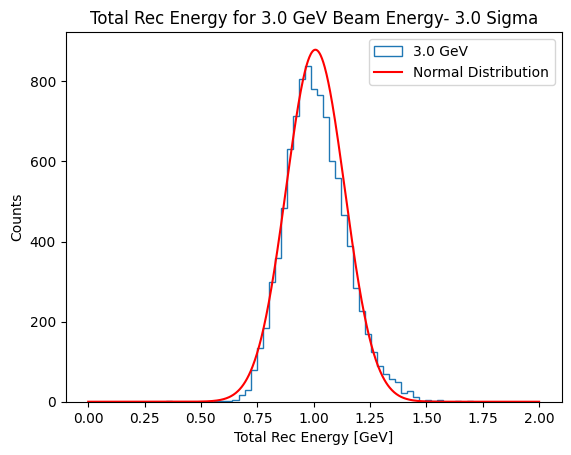

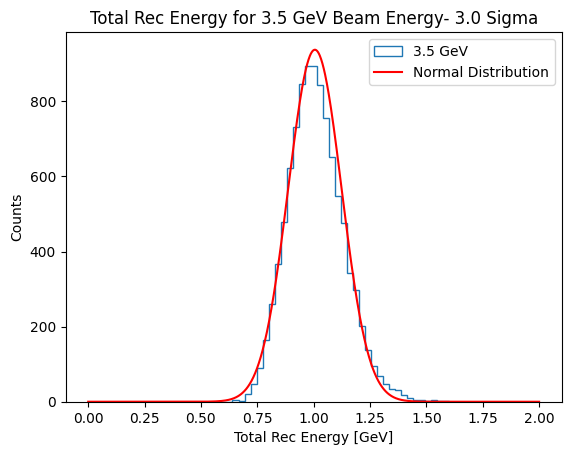

In [45]:
for beam_energy, root_file in beam_energies :
    total_rec_energy = root_file['LDMX_Events/EcalVeto_valid/summedDet_'].array(library='np')/(beam_energy*1000)
    mean, std = itermean(total_rec_energy)
    fig, ax = plt.subplots()
    ax.hist(total_rec_energy, label=f'{beam_energy} GeV',
             bins = 75, range=(0,2), histtype='step')
#Creating the x and y axis of the curve, where the y is the normal distirbution created from the calculated mean and std values. 
    x = np.linspace(0, 2, 1000)
    y = norm.pdf(x, loc=mean, scale=std)
#Rescaling the y axis so that the maximum values match (wihtout, the norm was pretty much a flat line)
    hist_max = ax.get_ylim()[1]
    y_max = np.max(y)
    y *= hist_max/y_max
    ax.plot(x, y, 'r-', label='Normal Distribution')
    ax.set_title(f'Total Rec Energy for {beam_energy} GeV Beam Energy- 3.0 Sigma')
    ax.set_xlabel('Total Rec Energy [GeV]')
    ax.set_ylabel('Counts')
    ax.legend()
    plt.show()
                      

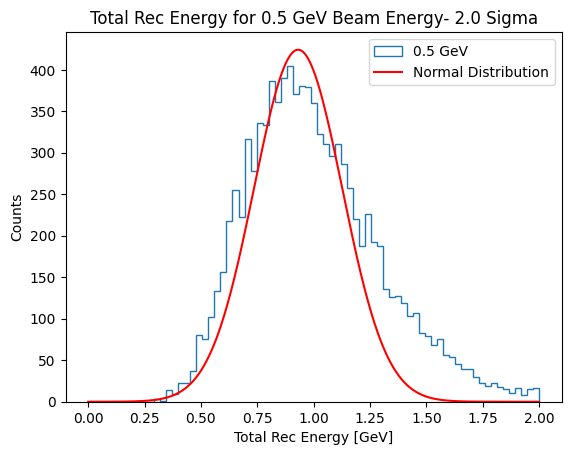

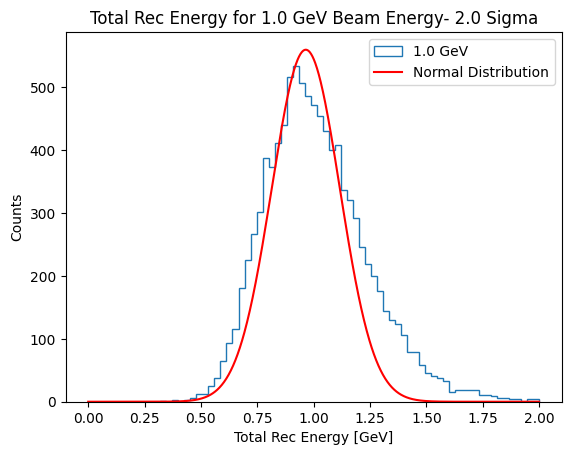

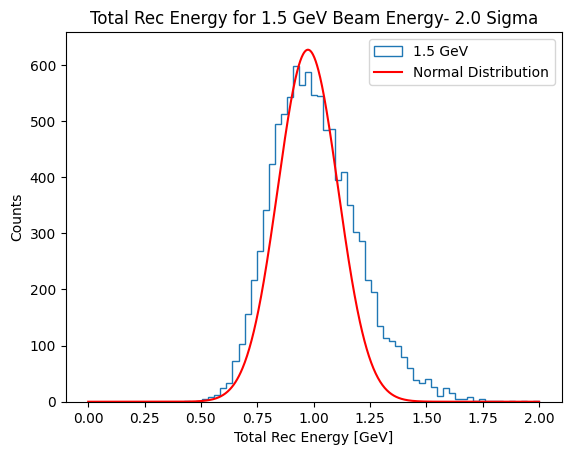

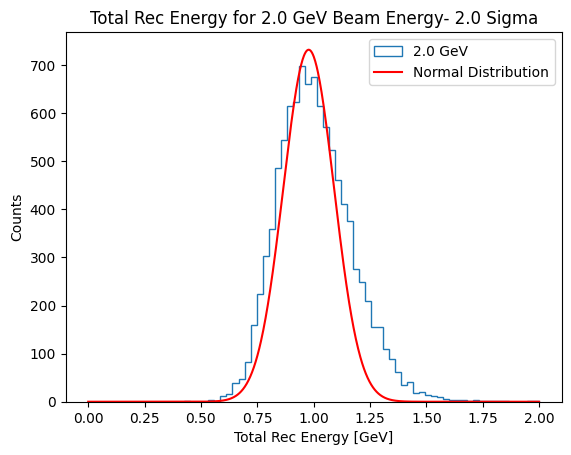

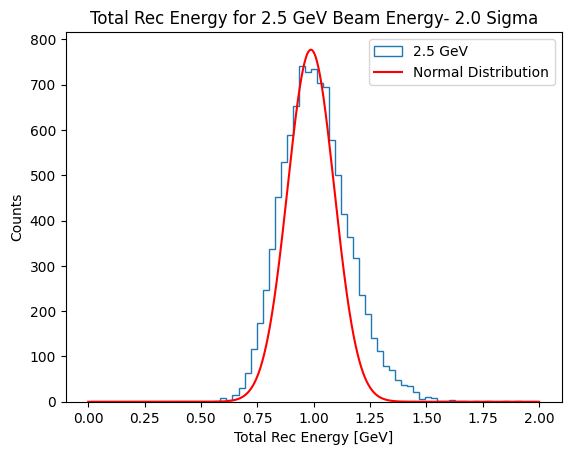

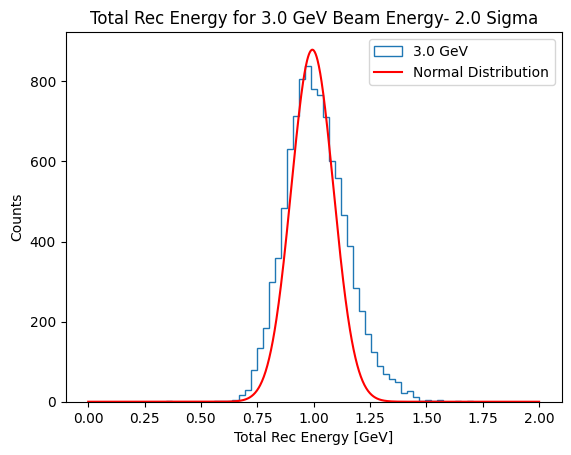

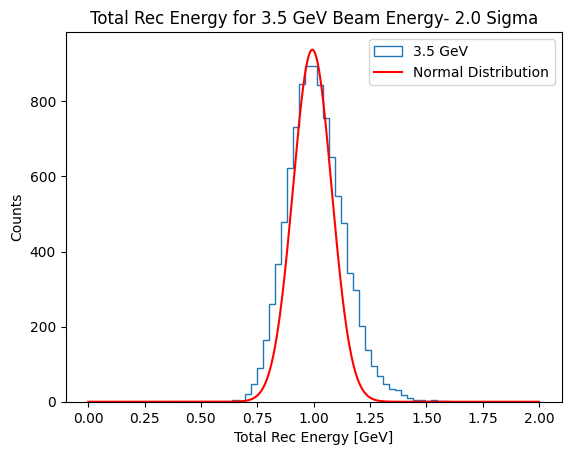

In [44]:
for beam_energy, root_file in beam_energies :
    total_rec_energy = root_file['LDMX_Events/EcalVeto_valid/summedDet_'].array(library='np')/(beam_energy*1000)
    mean, std = itermean2(total_rec_energy)
    fig, ax = plt.subplots()
    ax.hist(total_rec_energy, label=f'{beam_energy} GeV',
             bins = 75, range=(0,2), histtype='step')
    x = np.linspace(0, 2, 1000)
    y = norm.pdf(x, loc=mean, scale=std)
#Rescaling the y axis so that the maximum values match. 
    hist_max = ax.get_ylim()[1]
    y_max = np.max(y)
    y *= hist_max/y_max
    ax.plot(x, y, 'r-', label='Normal Distribution')
    ax.set_title(f'Total Rec Energy for {beam_energy} GeV Beam Energy- 2.0 Sigma')
    ax.set_xlabel('Total Rec Energy [GeV]')
    ax.set_ylabel('Counts')
    ax.legend()
    plt.show()

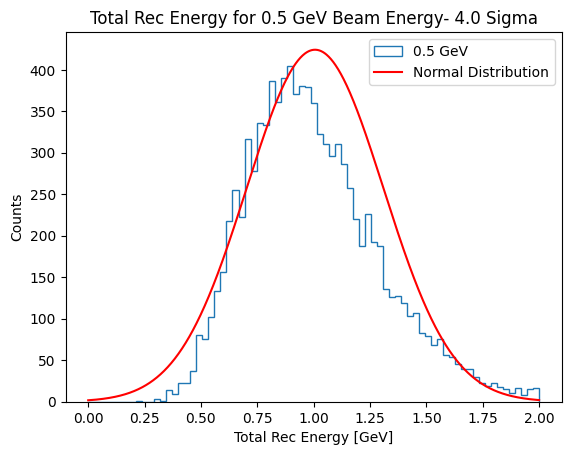

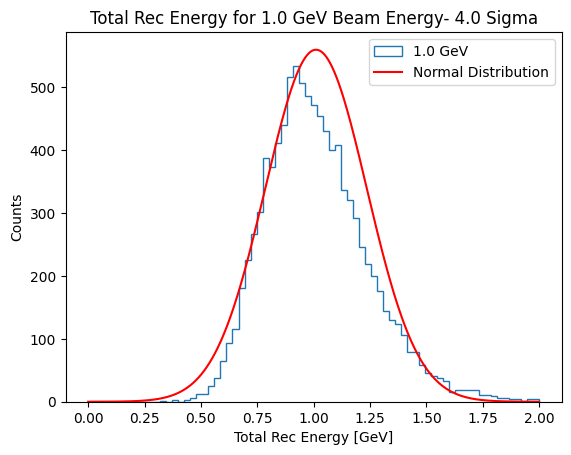

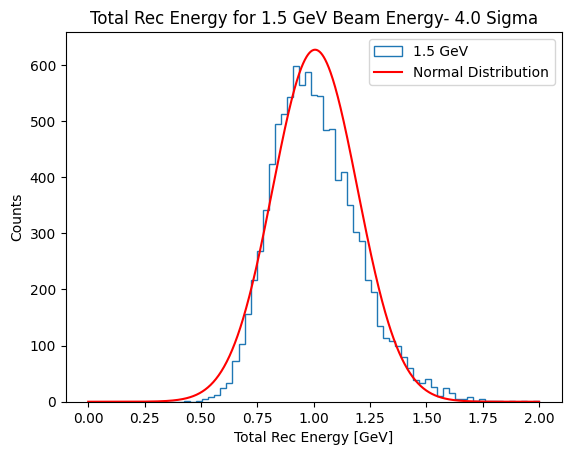

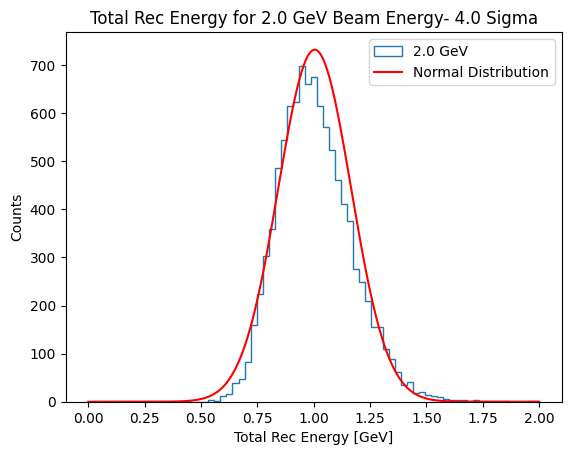

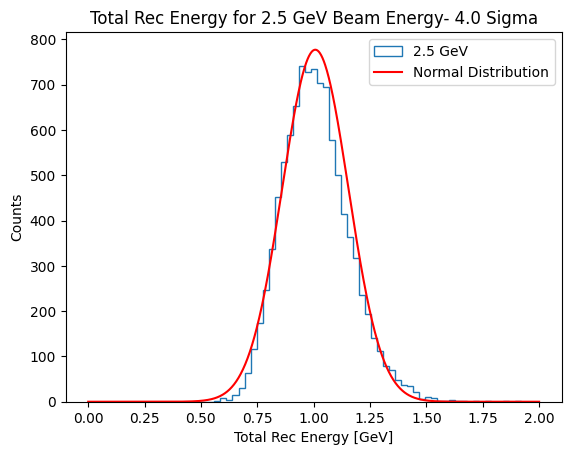

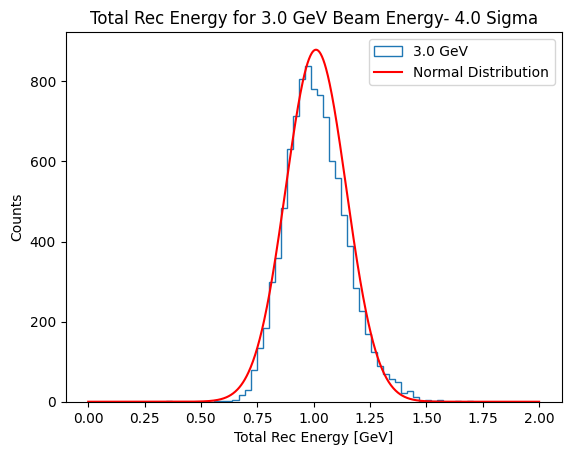

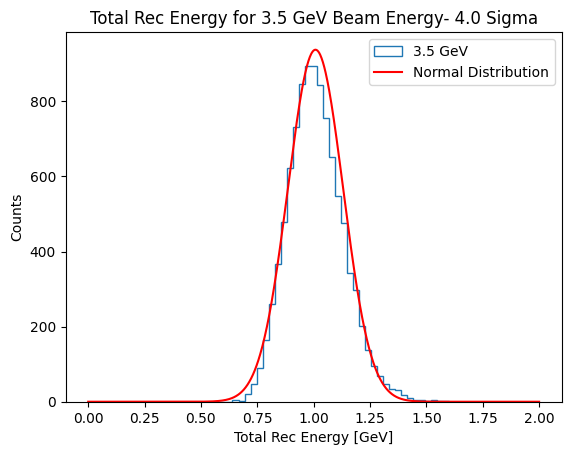

In [43]:
for beam_energy, root_file in beam_energies :
    total_rec_energy = root_file['LDMX_Events/EcalVeto_valid/summedDet_'].array(library='np')/(beam_energy*1000)
    mean, std = itermean4(total_rec_energy)
    fig, ax = plt.subplots()
    ax.hist(total_rec_energy, label=f'{beam_energy} GeV',
             bins = 75, range=(0,2), histtype='step')
    x = np.linspace(0, 2, 1000)
    y = norm.pdf(x, loc=mean, scale=std)
#Rescaling the y axis so that the maximum values match. 
    hist_max = ax.get_ylim()[1]
    y_max = np.max(y)
    y *= hist_max/y_max
    ax.plot(x, y, 'r-', label='Normal Distribution')
    ax.set_title(f'Total Rec Energy for {beam_energy} GeV Beam Energy- 4.0 Sigma')
    ax.set_xlabel('Total Rec Energy [GeV]')
    ax.set_ylabel('Counts')
    ax.legend()
    plt.show()
                      

General Trend: Higher sigmas are better, distribution is better at higher energies. The actual histogram shows a max value that is slightly less than what is predicted by the normal distribution line, so the true mean is less than the predicted iterative mean. 

#For loop for doing the sigma_cuts:
sigma_cuts = [2.0,3.0,4.0]
for sigma_cut in sigma_cuts:
    for beam_energy in beam_energies:
        total_rec_energy = root_file['LDMX_Events/EcalVeto_valid/summedDet_'].array(library='np')/(beam_energy*1000)
        mean, std = itermean(total_rec_energy, sigma_cut=sigma_cut)
        print(f'Sigma Cut: {sigma_cut}, Beam Energy: {beam_energy} GeV, Mean: {mean:.3f}, Std: {std:.3f}')